In [2]:
import numpy as np 
import healpy as hp
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
import pymaster as nmt

plt.style.use('default')
plt.rc('font', family='Helvetica')

In [3]:
PRBP_80 = np.loadtxt('./data/PR-BP_80_TT-EE-BB.dat')
PRBP_60 = np.loadtxt('./data/PR-BP_60_TT-EE-BB.dat')
PRBP_40 = np.loadtxt('./data/PR-BP_40_TT-EE-BB.dat')
PRBP_20 = np.loadtxt('./data/PR-BP_20_TT-EE-BB.dat')

sync_obs = [PRBP_80, PRBP_60, PRBP_40, PRBP_20]


In [4]:
bias_std_80 = np.loadtxt('./data/PlanckRevisited_80_EE-BB-bias-error.dat')
bias_std_60 = np.loadtxt('./data/PlanckRevisited_60_EE-BB-bias-error.dat')
bias_std_40 = np.loadtxt('./data/PlanckRevisited_40_EE-BB-bias-error.dat')
bias_std_20 = np.loadtxt('./data/PlanckRevisited_20_EE-BB-bias-error.dat')

bias_std = [bias_std_80, bias_std_60, bias_std_40, bias_std_20]

In [5]:
s5_80 = np.loadtxt('./data/PySM-s5_80_TT-EE-BB.dat')
s5_60 = np.loadtxt('./data/PySM-s5_60_TT-EE-BB.dat')
s5_40 = np.loadtxt('./data/PySM-s5_40_TT-EE-BB.dat')
s5_20 = np.loadtxt('./data/PySM-s5_20_TT-EE-BB.dat')

s5 = [s5_80, s5_60, s5_40, s5_20]

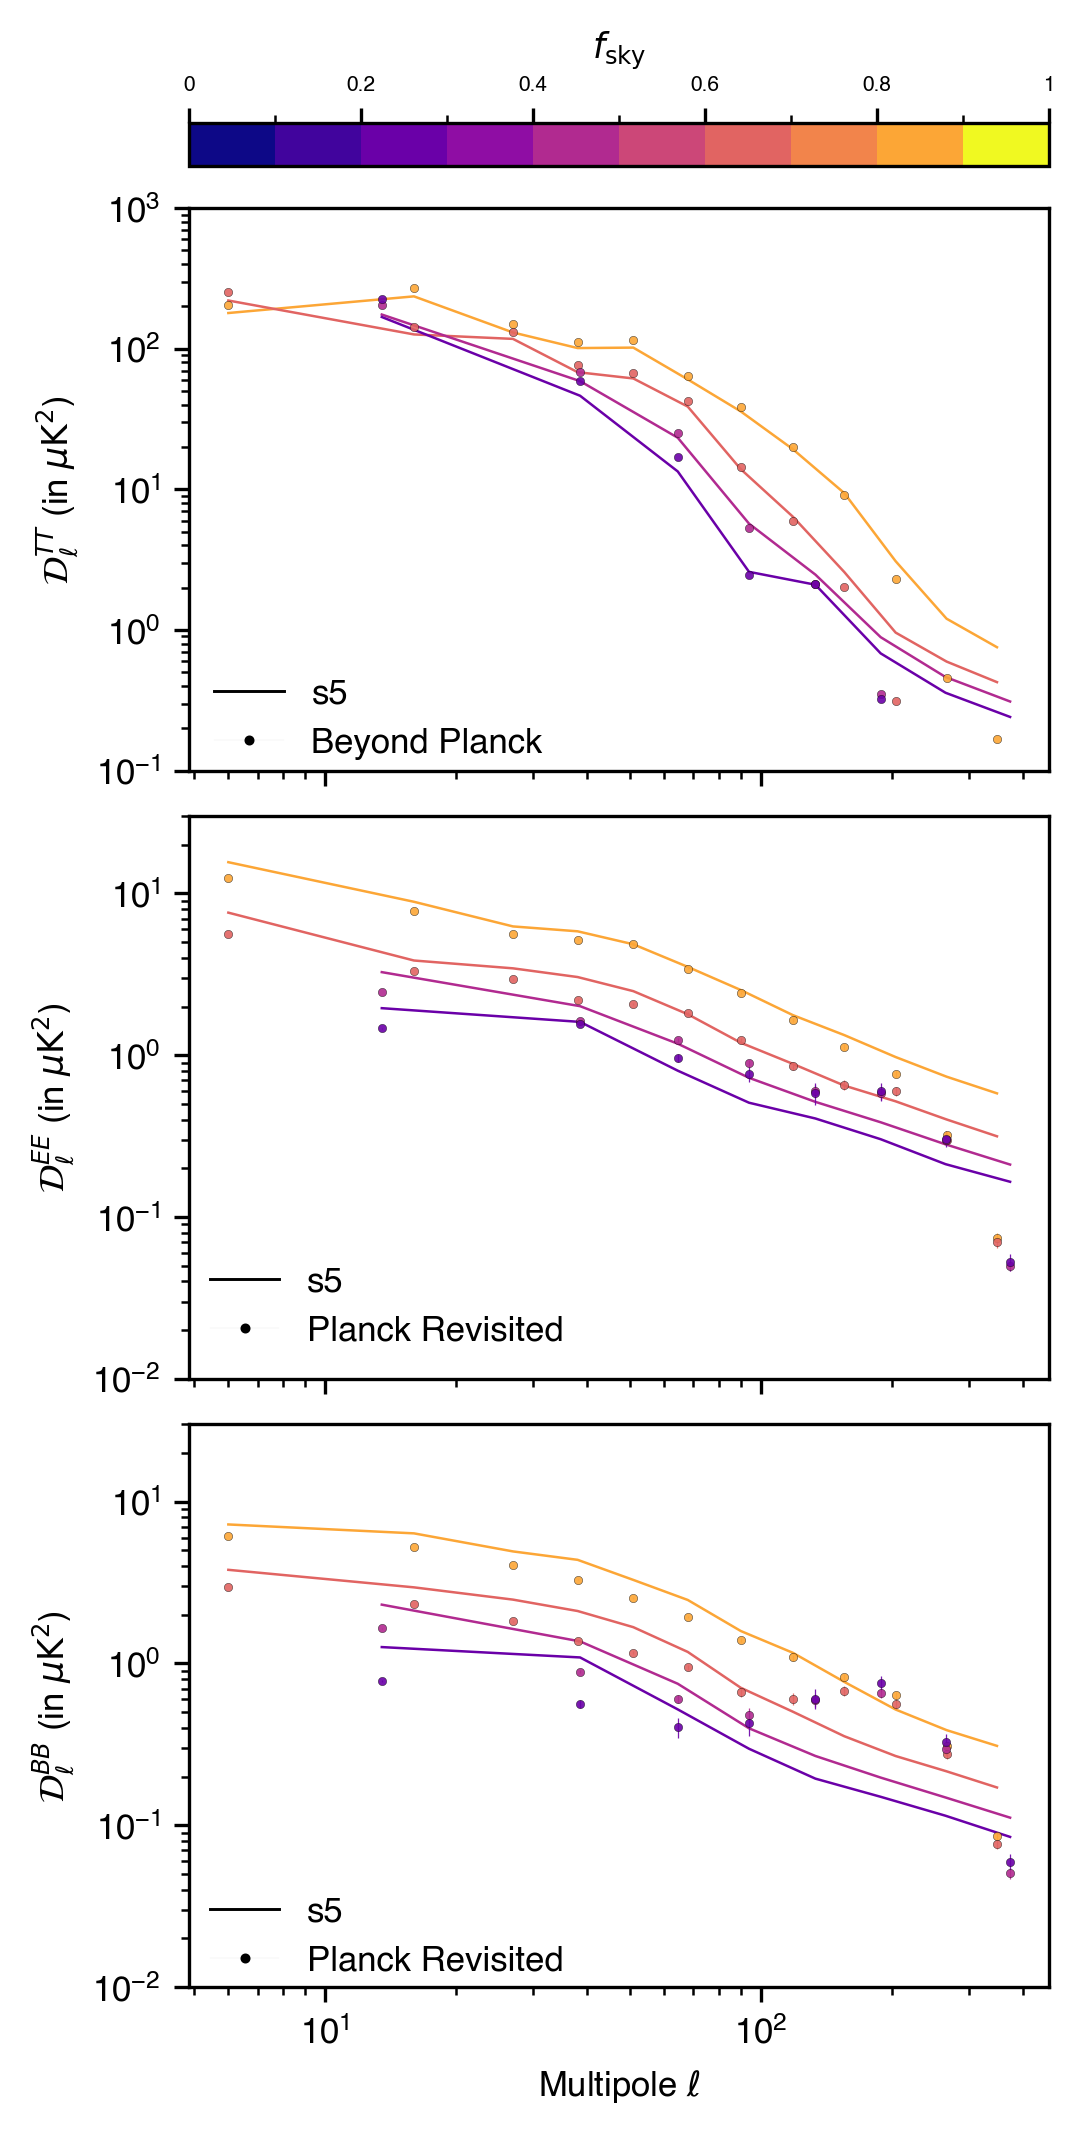

In [50]:
n = 11
colors = plt.cm.plasma(np.linspace(0, 1., n))
fsky = np.linspace(0., 1., n)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(3.5, 7), dpi=300, constrained_layout = True)

j = 10
for i in range(4):
    j -= 2
    ax0.plot(s5[i][0],    s5[i][1], '-', lw=0.60, c=colors[j])
    ax0.errorbar(sync_obs[i][0], sync_obs[i][1], yerr=None, fmt='o', c=colors[j], alpha=0.9, ms=2., mec='k', mew=0.1, elinewidth=0.3)

    ax1.plot(s5[i][0],    s5[i][2], '-', lw=0.60, c=colors[j])
    ax1.errorbar(sync_obs[i][0], sync_obs[i][2] - bias_std[i][0], yerr=bias_std[i][1], fmt='o', ms=2., mec='k', mew=0.1, c=colors[j], alpha=0.9, elinewidth=0.3)

    ax2.plot(s5[i][0],    s5[i][3], '-', lw=0.60, c=colors[j])
    ax2.errorbar(sync_obs[i][0], sync_obs[i][3] - bias_std[i][2], yerr=bias_std[i][3], fmt='o', ms=2., mec='k', mew=0.1, c=colors[j], alpha=0.9, elinewidth=0.3)

l1 = Line2D([0,1],[0,1],linestyle='-',lw=0.7, color='k')
m1 = Line2D([], [], c='k', lw=0.01, marker='o', ms=1.4)

line_legend = fig.legend([l1, m1], ['s5','Beyond Planck'],   fontsize='small', bbox_to_anchor=(0.53, 0.70), frameon=False)
line_legend = fig.legend([l1, m1], ['s5','Planck Revisited'],fontsize='small', bbox_to_anchor=(0.55, 0.42), frameon=False)
line_legend = fig.legend([l1, m1], ['s5','Planck Revisited'],fontsize='small', bbox_to_anchor=(0.55, 0.12), frameon=False)

ax0.loglog()
ax0.set_ylim(top=1e3,bottom=1e-1)
ax0.xaxis.set_tick_params(labelsize='small')
ax0.yaxis.set_tick_params(labelsize='small')
ax0.set_ylabel(r'$\mathcal{D}_\ell^{TT}$ (in $\mu{\rm K}^2$)', fontsize='small')

ax1.loglog()
ax1.set_ylim(top=3e1,bottom=1e-2)
ax1.xaxis.set_tick_params(labelsize='small')
ax1.yaxis.set_tick_params(labelsize='small')
ax1.set_ylabel(r'$\mathcal{D}_\ell^{EE}$ (in $\mu{\rm K}^2$)', fontsize='small')

ax2.loglog()
ax2.set_ylim(top=3e1,bottom=1e-2)
ax2.xaxis.set_tick_params(labelsize='small')
ax2.yaxis.set_tick_params(labelsize='small')
ax2.set_xlabel(r'Multipole $\ell$', fontsize='small',)
ax2.set_ylabel(r'$\mathcal{D}_\ell^{BB}$ (in $\mu{\rm K}^2$)', fontsize='small')

cbar = plt.colorbar(ScalarMappable(norm=BoundaryNorm(fsky, ncolors=n), cmap=ListedColormap(colors)), ax=ax0, location='top')
cbar.ax.set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], fontsize='small')
cbar.set_label(r'$f_{\rm sky}$',size='small')
cbar.ax.tick_params(labelsize=5) 

plt.savefig('./Dlcomp_PySM3-4_s5_vs_BPPR_SYNC.png', bbox_inches='tight', pad_inches=0.1)


In [21]:
masks = []
for fsky_i in [20, 39, 60, 81]:
    masks.append(hp.read_map(f'./data/PR-sync-gal_fsky{fsky_i}_nside1024.fits'))

masks = np.array(masks)

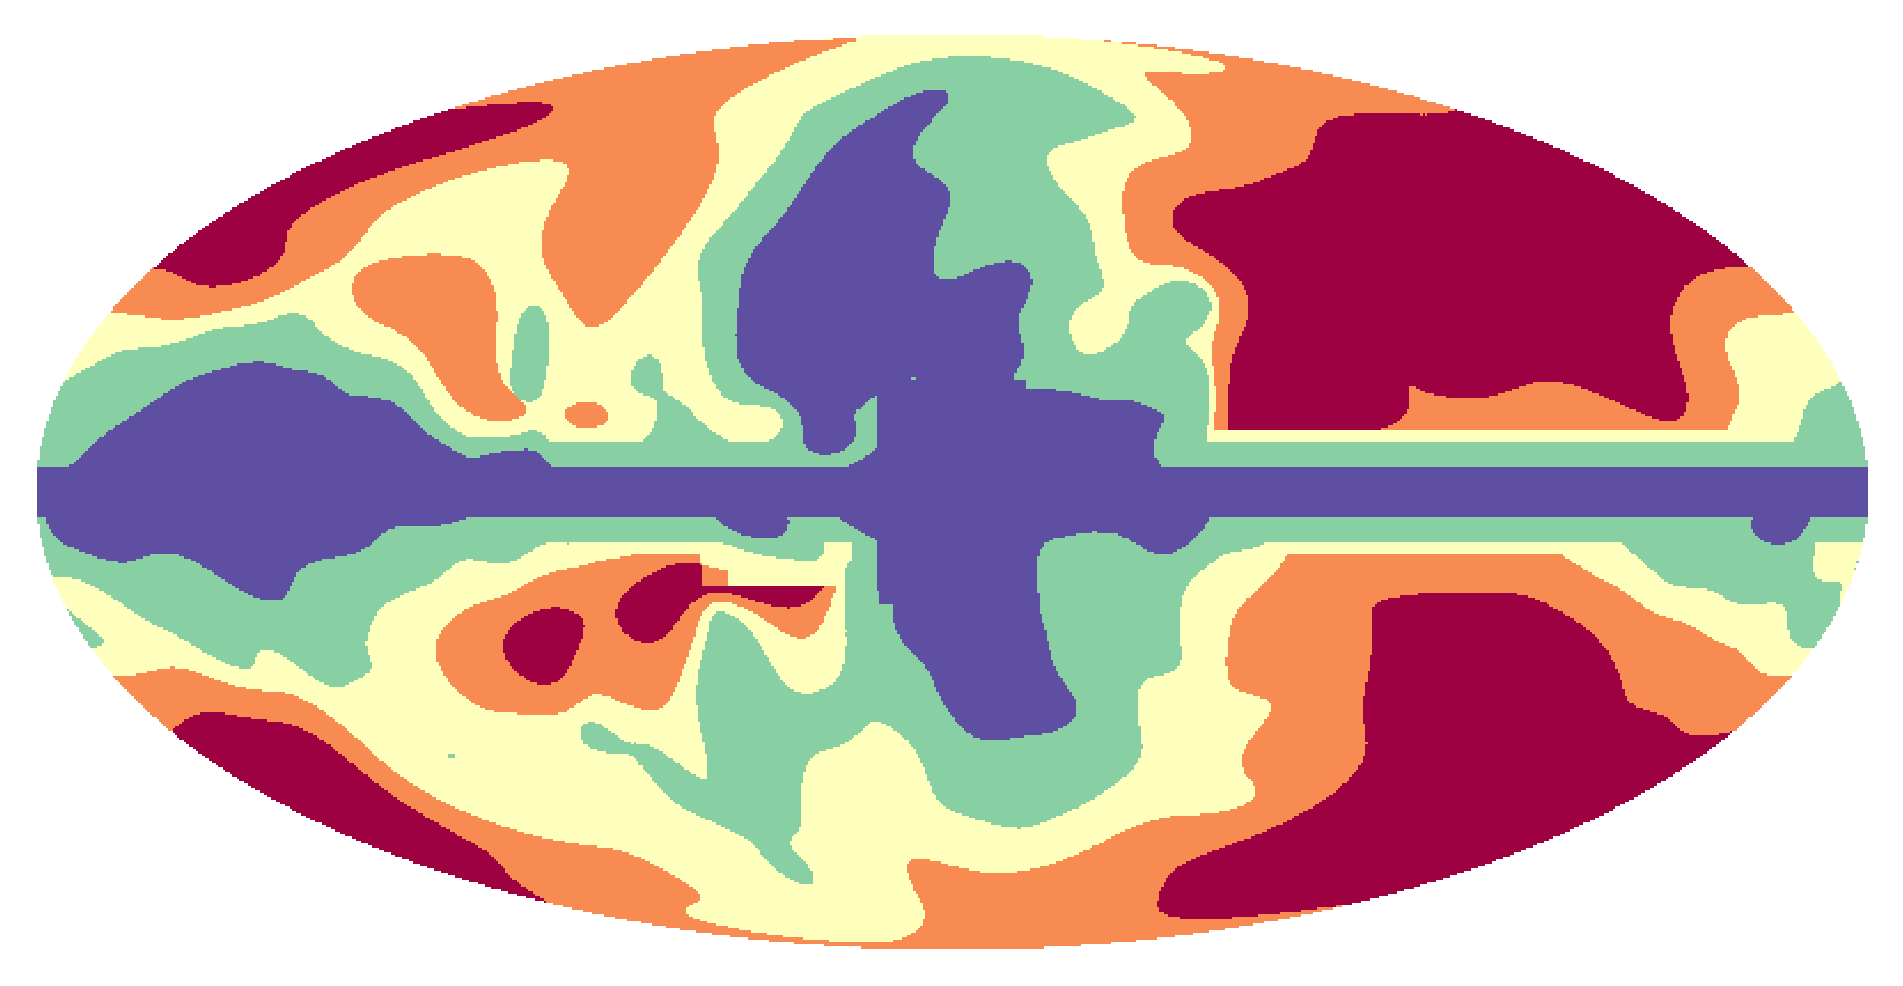

In [44]:
fig = plt.figure(dpi=300)
hp.mollview(np.sum(masks, axis=0), min=0, max=4, cmap='Spectral_r', fig=fig.number, title=None, cbar=False)
plt.savefig('./SYNC_mask_stack.png', bbox_inches='tight', pad_inches=0.1)